<a href="https://colab.research.google.com/github/rogersirius2023/Atvidades/blob/main/C%C3%B3pia_de_Semana3_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/sirius/exercicios/arquivos/ideb_3.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.loc[:, ['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
df.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [ ]:
df_2019 = df[df.ano == 2019]
df_2019_by_Estado = df_2019.groupby(by='sigla_uf').mean()
df_2019_by_Estado.drop(axis=1, labels=['ano'], inplace=True)
df_2019_by_Estado.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,
AC,88.561184,245.253478,237.995942,4.671739
AL,92.081591,237.883189,231.412708,4.509295
AM,86.853550,223.121965,219.773218,4.032397
AP,81.552252,217.216667,215.831111,3.694444
BA,83.032948,233.942537,230.205596,4.034125


In [ ]:
df_2019_by_Estado.corr()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
taxa_aprovacao,1.000000,0.694758,0.678749,0.810383
nota_saeb_matematica,0.694758,1.000000,0.991215,0.956512
nota_saeb_lingua_portuguesa,0.678749,0.991215,1.000000,0.938921
ideb,0.810383,0.956512,0.938921,1.000000


### Atividade 3: Padronize os dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

idx_siglas = df_2019_by_Estado.index.to_list()

stander_scaler = StandardScaler()

In [ ]:
scaled_2019_by_estado = stander_scaler.fit_transform(df_2019_by_Estado)

In [ ]:
df_scaled_2019_by_estado = pd.DataFrame(scaled_2019_by_estado, columns=df_2019_by_Estado.columns)
df_scaled_2019_by_estado['sigla_uf'] = idx_siglas
df_scaled_2019_by_estado.set_index('sigla_uf', inplace=True)
df_scaled_2019_by_estado.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,
AC,-0.025280,0.080727,-0.016434,0.092154
AL,0.801179,-0.437122,-0.531887,-0.201424
AM,-0.426168,-1.474271,-1.443233,-1.063297
AP,-1.670713,-1.889188,-1.751891,-1.674063
BA,-1.323101,-0.713999,-0.626401,-1.060175


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

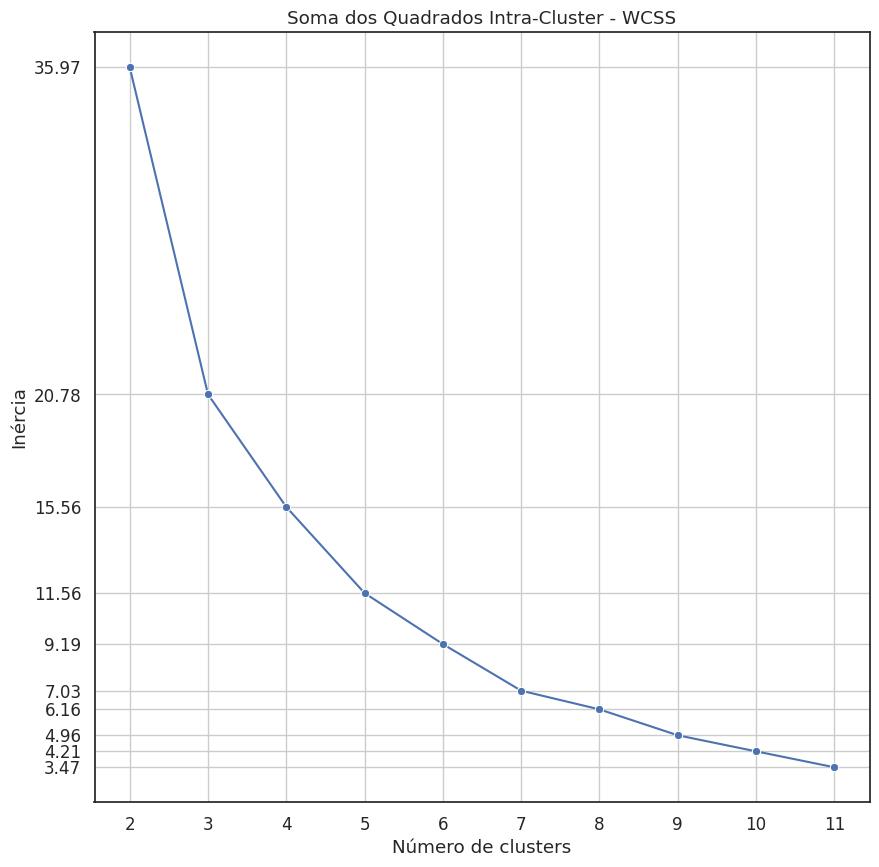

In [ ]:
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

# WCSS (Within-Cluster Sum of Squares) é uma medida utilizada no algoritmo 
# K-means para avaliar a qualidade da clusterização. Essa medida calcula a 
# soma dos quadrados das distâncias entre cada amostra e o centro do cluster 
# ao qual ela pertence.
# WCSS é igual a inércia. Quanto maior a inércia mais próximo aqueles dados estão
# de seu centróide.
wcss = []
x_min = 2
x_max = 11
# for n in range(x_min, x_max+1):
#   kmeans = KMeans(n_clusters=n, random_state=42, n_init=x_max)
#   kmeans.fit(X=df_scaled_2019_by_estado)
#   wcss.append(kmeans.inertia_)

def calculate_wcss(data, x_min, x_max):
    wcss = []
    for n in range(x_min, x_max+1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=x_max)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

sum_of_squares = calculate_wcss(data=df_scaled_2019_by_estado, x_min=x_min, x_max=x_max)

sns.set(style='white', font_scale=1.1, rc={'figure.figsize': (10, 10)})

sns.lineplot(x=range(x_min, x_max+1), y=sum_of_squares, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster - WCSS')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(range(x_min, x_max + 1))
plt.yticks(sum_of_squares)
plt.grid(True)

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer

# # Instantiate the clustering model and visualizer
# km = KMeans(n_clusters=nclus, init='k-means++', n_init=10, random_state=42)
# visualizer = KElbowVisualizer(km, k=(2,10))
 
# visualizer.fit(df_padronizado)        # Fit the data to the visualizer
# visualizer.show()

from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
  
# calculando a quantidade ótima de clusters
k_otimo_cotovelo = optimal_number_of_clusters(sum_of_squares)

print(f'Quantidade ótima de cluster usando o método cotovelo: {k_otimo_cotovelo} clusters')

Quantidade ótima de cluster usando o método cotovelo: 7 clusters


### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

In [ ]:
from sklearn.metrics import silhouette_score

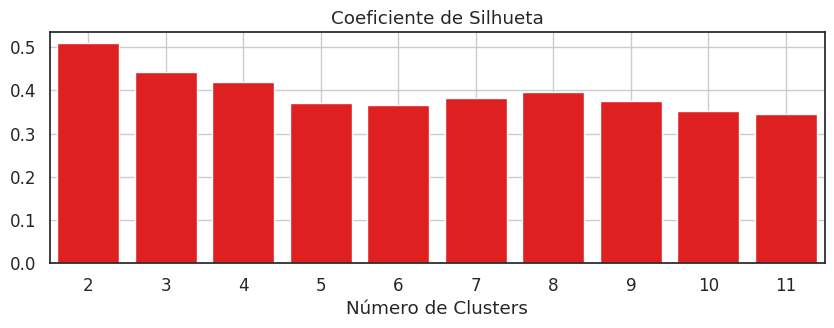

In [ ]:
silhueta = []

n = [i for i in range(x_min, x_max + 1)]

for i in range(x_min, x_max + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=x_max)
    kmeans.fit(df_scaled_2019_by_estado)
    silhueta.append(silhouette_score(df_scaled_2019_by_estado,
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.set(style='white', font_scale=1.1, rc={'figure.figsize': (10, 3)})
sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

In [ ]:
# O coeficiente silhuera varia de -1 a +1, em que 
# +1 denota está muito coeso com seu cluster e muitos distante dos demais clusters; 
# 0 denota sobreposição de clusters
# -1 indica resultados muito ruins.
# Neste caso ficaria entre 2 como o candidato a melhor porém talvez 3 seja melhor para a questão
k_otimo_silhueta =  n[silhueta.index(max(silhueta))]
print(f'Quantidade ótima de cluster usando o método silhueta: {k_otimo_silhueta} clusters')


Quantidade ótima de cluster usando o método silhueta: 2 clusters


In [ ]:
# Dois é um valor não muito adequado para um grupo de 27 estados. Sendo assim, o valor 4 pode vir ai cair melhor. 
k_otimo_silhueta = 4

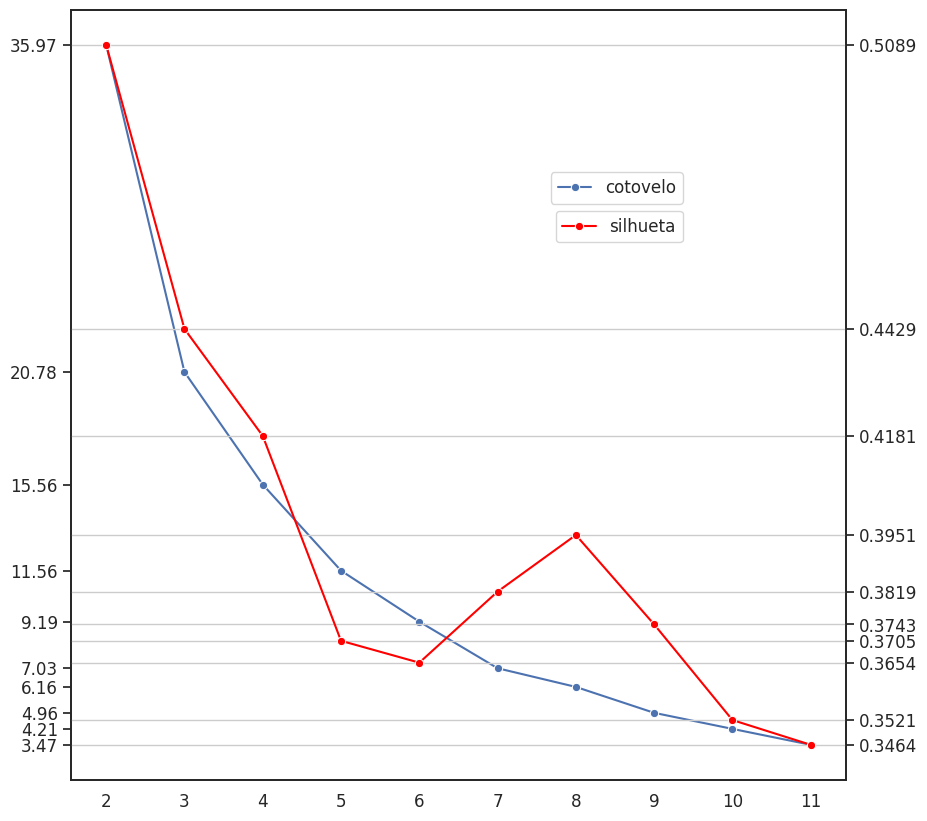

In [ ]:
# Sobrepondo os gráficos
sns.set(style='white', font_scale=1.1, rc={'figure.figsize': (10, 10)})
fig, ax = plt.subplots()
sns.lineplot(x=range(x_min, x_max + 1), y=sum_of_squares, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 0.8), loc='upper right')
plt.yticks(sum_of_squares)
ax2 = ax.twinx()
sns.lineplot(x=range(x_min, x_max + 1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.75), loc='upper right')
plt.xticks(range(x_min, x_max + 1))
plt.yticks(silhueta)
plt.grid(True)

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [ ]:
df_scaled_2019_by_estado.head(2)

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,
AC,-0.025280,0.080727,-0.016434,0.092154
AL,0.801179,-0.437122,-0.531887,-0.201424


In [ ]:
# instanciando o algoritmo para o método Cotovelo
kmeans = KMeans(n_clusters=k_otimo_cotovelo, random_state=42, n_init=10)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled_2019_by_estado)

# criando a coluna 'grupo'
df_scaled_2019_by_estado['grupos_cotovelo'] = kmeans.labels_.tolist()


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

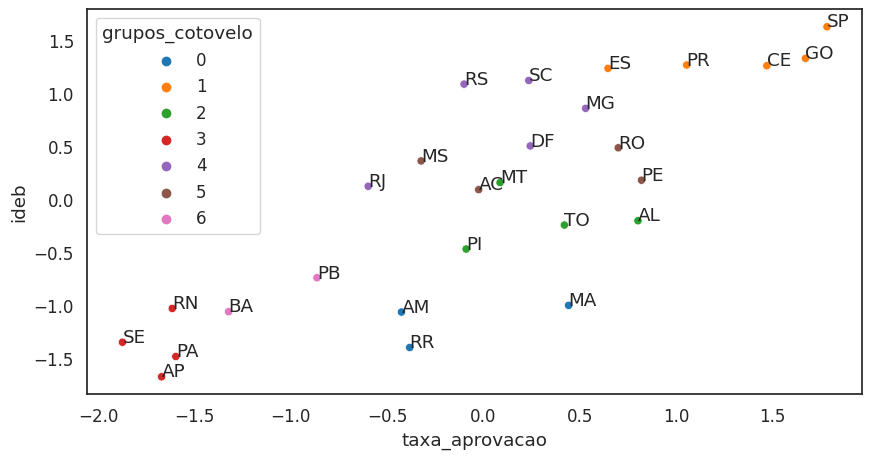

In [ ]:
x = 'taxa_aprovacao'
y = 'ideb'

# criando o gráfico de dispersão
sns.set(style='white', font_scale=1.1, rc={'figure.figsize': (10, 5)})
sns.scatterplot(data=df_scaled_2019_by_estado, x=x, y=y, hue='grupos_cotovelo', palette='tab10');

# anotando os 'nomes' de cada ponto
for index, row in df_scaled_2019_by_estado.iterrows():
  plt.annotate(index, (row[x], row[y]))

### Atividade 8: Quais são os estados de cada grupo?

In [ ]:
max_grupo = df_scaled_2019_by_estado['grupos_cotovelo'].max()
grupos_estados = {n: [] for n in range(0, max_grupo + 1)}

for index, row in df_scaled_2019_by_estado.iterrows():
  grupos_estados[row['grupos_cotovelo']].append(index)

print(grupos_estados)

{0: ['AM', 'MA', 'RR'], 1: ['CE', 'ES', 'GO', 'PR', 'SP'], 2: ['AL', 'MT', 'PI', 'TO'], 3: ['AP', 'PA', 'RN', 'SE'], 4: ['DF', 'MG', 'RJ', 'RS', 'SC'], 5: ['AC', 'MS', 'PE', 'RO'], 6: ['BA', 'PB']}


### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

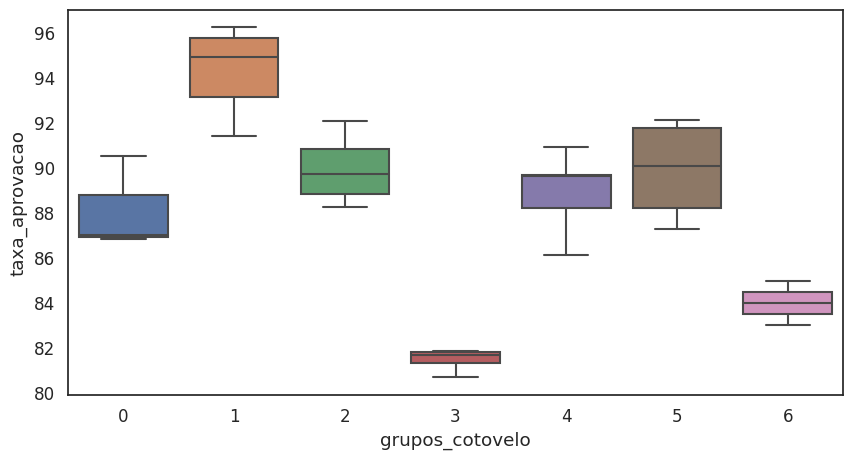

In [ ]:
df_2019_by_Estado['grupos_cotovelo'] = df_scaled_2019_by_estado['grupos_cotovelo']
sns.boxplot(x='grupos_cotovelo', y=x, data=df_2019_by_Estado)
plt.show()

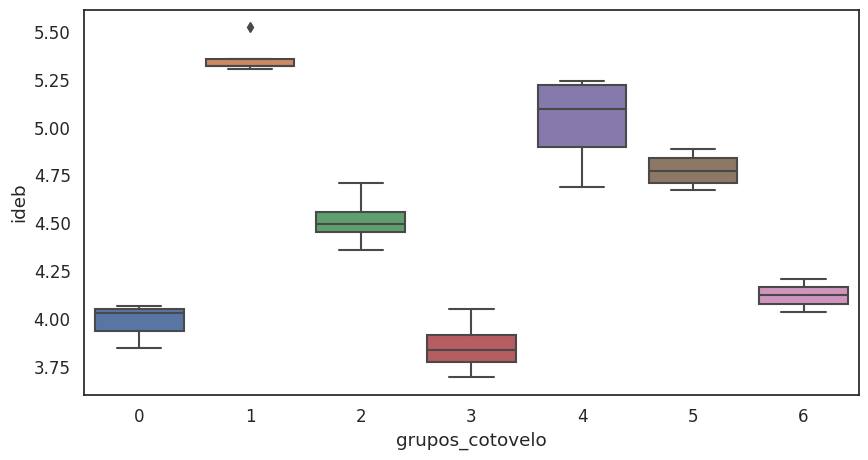

In [ ]:
sns.boxplot(x='grupos_cotovelo', y=y, data=df_2019_by_Estado)
plt.show()

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=df_scaled_2019_by_estado['ideb'], groups=df_scaled_2019_by_estado['grupos_cotovelo'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.4994    0.0  1.8498  3.1491   True
     0      2   0.9657 0.0025  0.2862  1.6451   True
     0      3  -0.2297 0.9194 -0.9091  0.4497  False
     0      4   1.8935    0.0  1.2439  2.5432   True
     0      5   1.4347    0.0  0.7553  2.1142   True
     0      6   0.2539 0.9429 -0.5582   1.066  False
     1      2  -1.5338    0.0 -2.1305  -0.937   True
     1      3  -2.7292    0.0 -3.3259 -2.1324   True
     1      4  -0.6059 0.0297 -1.1685 -0.0433   True
     1      5  -1.0647 0.0002 -1.6615 -0.4679   True
     1      6  -2.2455    0.0 -2.9898 -1.5012   True
     2      3  -1.1954 0.0001 -1.8244 -0.5663   True
     2      4   0.9279  0.001  0.3311  1.5246   True
     2      5   0.4691 0.2349 -0.1599  1.0981  False
     2      6  -0.7117 0.0822 -1.4821  0.0587  False
     3      4   2.1232    0.0  1.5265    2.72 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=df_scaled_2019_by_estado['taxa_aprovacao'], groups=df_scaled_2019_by_estado['grupos_cotovelo'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.4472 0.0025  0.4283   2.466   True
     0      2   0.4267 0.8404 -0.6389  1.4922  False
     0      3  -1.5665 0.0018  -2.632  -0.501   True
     0      4    0.184 0.9964 -0.8348  1.2028  False
     0      5    0.415 0.8564 -0.6506  1.4805  False
     0      6  -0.9711 0.2146 -2.2446  0.3024  False
     1      2  -1.0205  0.027 -1.9564 -0.0846   True
     1      3  -3.0136    0.0 -3.9495 -2.0778   True
     1      4  -1.2632 0.0023 -2.1455 -0.3808   True
     1      5  -1.0322 0.0248 -1.9681 -0.0963   True
     1      6  -2.4183    0.0 -3.5855  -1.251   True
     2      3  -1.9931    0.0 -2.9796 -1.0067   True
     2      4  -0.2426 0.9764 -1.1785  0.6932  False
     2      5  -0.0117    1.0 -0.9982  0.9748  False
     2      6  -1.3978  0.017  -2.606 -0.1896   True
     3      4   1.7505 0.0001  0.8146  2.6864 

In [ ]:
# Boa parte dos grupos são distintos

### Atividade 11: Faça a clusterização com outro valor para k.

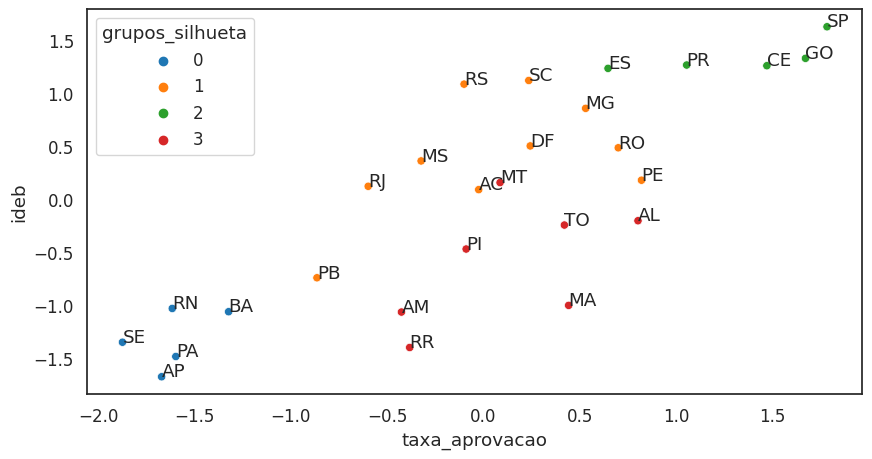

In [ ]:
# instanciando o algoritmo para o método Cotovelo
kmeans = KMeans(n_clusters=k_otimo_silhueta, random_state=42, n_init=10)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled_2019_by_estado)

# criando a coluna 'grupo'
df_scaled_2019_by_estado['grupos_silhueta'] = kmeans.labels_.tolist()

# criando o gráfico de dispersão
sns.set(style='white', font_scale=1.1, rc={'figure.figsize': (10, 5)})
sns.scatterplot(data=df_scaled_2019_by_estado, x=x, y=y, hue='grupos_silhueta', palette='tab10');

# anotando os 'nomes' de cada ponto
for index, row in df_scaled_2019_by_estado.iterrows():
  plt.annotate(index, (row[x], row[y]))

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=df_scaled_2019_by_estado['ideb'], groups=df_scaled_2019_by_estado['grupos_silhueta'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.7271    0.0  1.0172  2.4371   True
     0      2   2.6645    0.0  1.8447  3.4842   True
     0      3   0.7168 0.0688 -0.0421  1.4758  False
     1      2   0.9374 0.0067  0.2274  1.6473   True
     1      3  -1.0103 0.0012  -1.649 -0.3715   True
     2      3  -1.9476    0.0 -2.7066 -1.1887   True
----------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=df_scaled_2019_by_estado['taxa_aprovacao'], groups=df_scaled_2019_by_estado['grupos_silhueta'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.6771    0.0  0.9681  2.3861   True
     0      2   2.9404    0.0  2.1218  3.7591   True
     0      3   1.7371    0.0  0.9791   2.495   True
     1      2   1.2634 0.0003  0.5544  1.9723   True
     1      3     0.06 0.9936 -0.5779  0.6979  False
     2      3  -1.2034 0.0011 -1.9613 -0.4454   True
----------------------------------------------------


In [ ]:
# Boa parte dos grupos são distintos

In [ ]:
from scipy.stats import f_oneway

k = 4

anova_results = {}
for coluna in ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']:
  grupos = []
  for grupo in range(k):
    grupos.append(df_2019_by_Estado[df_2019_by_Estado['grupos_cotovelo'] == grupo][coluna])
  f_value, p_value = f_oneway(*grupos)
  anova_results[coluna] = {'F-value': f_value, 'p-value': p_value}

# Exibir os resultados da ANOVA
print(f'Para k = {k}\n')
for coluna, resultados in anova_results.items():
    print(f'{coluna}:')
    print(f'F-value: {resultados["F-value"]}')
    print(f'p-value: {resultados["p-value"]}')
    if resultados["p-value"] < 0.05:
        print("Os grupos são estatisticamente distintos.")
    else:
        print("Não há evidência estatística de diferença significativa entre os grupos.")
    print('\n')


Para k = 4

taxa_aprovacao:
F-value: 43.88747030107347
p-value: 9.597224933101412e-07
Os grupos são estatisticamente distintos.


nota_saeb_matematica:
F-value: 84.5135031178253
p-value: 2.448938511881017e-08
Os grupos são estatisticamente distintos.


nota_saeb_lingua_portuguesa:
F-value: 115.44878934600551
p-value: 4.075677261499862e-09
Os grupos são estatisticamente distintos.


ideb:
F-value: 130.78906950181306
p-value: 1.9773864742237113e-09
Os grupos são estatisticamente distintos.




### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: 

In [ ]:
# Olhando as estatísticas, o k=4 parece mais adequeado.

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

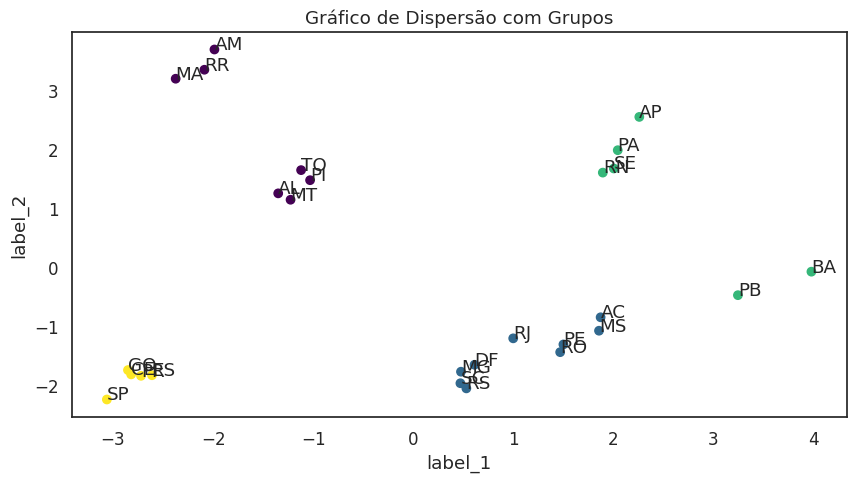

In [ ]:
# Algumas formas de reduzir a dimensionalidade são através das seguintes técnicas:
# 
# Análise de Componentes Principais (PCA)
# Análise de Discriminante Linear (LDA)
# Agrupamento de variáveis: Outra abordagem é agrupar variáveis altamente correlacionadas juntas.
# Autoencoders
# t-SNE, UMAP

# Vamos usar PCA para exemplo:
# Redução de dimensionalidade usando PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dados_reduzidos = pca.fit_transform(df_scaled_2019_by_estado)

# Definir o valor de k escolhido para a clusterização
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(dados_reduzidos)

# Adicionar as labels de cluster ao DataFrame original
df_scaled_2019_by_estado['cluster'] = labels

df_dados_reduzidos = pd.DataFrame(dados_reduzidos, columns=['label_1', 'label_2'])
df_dados_reduzidos['sigla_uf'] = df_scaled_2019_by_estado.index
df_dados_reduzidos.set_index('sigla_uf', inplace=True)

# Visualizar os grupos em um gráfico de dispersão com as duas principais componentes do PCA
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], c=labels, cmap='viridis')
plt.xlabel('label_1')
plt.ylabel('label_2')
plt.title('Gráfico de Dispersão com Grupos')

# anotando os 'nomes' de cada ponto
for index, row in df_dados_reduzidos.iterrows():
  plt.annotate(index, (row['label_1'], row['label_2']))

plt.show()